# Analyzing Amazon's Best Selling Books with Pandas

### Introduction

This project aims to analyze the top 50 bestselling books on Amazon from 2009 to 2019 using Python and the Pandas library. By exploring this dataset, we can uncover trends in book sales, identify popular genres, analyze pricing patterns, and gain insights into customer ratings over the years. The analysis will help in understanding the key characteristics of bestsellers, such as which authors frequently appear, whether fiction or non-fiction dominates, and how ratings influence book success.

### Dataset Description

The dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/sootersaalu/amazon-top-50-bestselling-books-2009-2019?resource=download), contains information on the top 50 bestselling books on Amazon over a span of 11 years (2009-2019). It consists of the following columns:

- Name – The title of the book
- Author – The author's name
- User Rating – Average customer rating (out of 5)
- Reviews – Number of customer reviews
- Price – The price of the book in USD(as of 2020)
- Year – The year the book was a bestseller
- Genre – Categorized as either Fiction or Non-Fiction

This structured dataset allows for various analytical approaches, including exploratory data analysis (EDA), data visualization, and statistical insights into book sales trends.

## Step 1: Import Pandas and Load the Spreadsheet

Import the 'pandas' library and load the bestsellers.csv spreadsheet into a variable 'df', a DataFrame object that allows us to work with tabular data via pandas.

In [2]:
import pandas as pd

df = pd.read_csv('/content/bestsellers.csv')

## Step 2: Explore the Data

Now we use various functions from the pandas library to explore the data from the spreadsheet.

In [3]:
# Get the first 5 rows of the spreadsheet
print(df.head())

                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


In [4]:
# Get the shape of the spreadsheet
print(df.shape)

(550, 7)


In [5]:
# Get the column names of the spreadsheet
print(df.columns)

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')


In [6]:
# Get summary statistics for each column
print(df.describe())

       User Rating       Reviews       Price         Year
count   550.000000    550.000000  550.000000   550.000000
mean      4.618364  11953.281818   13.100000  2014.000000
std       0.226980  11731.132017   10.842262     3.165156
min       3.300000     37.000000    0.000000  2009.000000
25%       4.500000   4058.000000    7.000000  2011.000000
50%       4.700000   8580.000000   11.000000  2014.000000
75%       4.800000  17253.250000   16.000000  2017.000000
max       4.900000  87841.000000  105.000000  2019.000000


# Step 3: Visualize data using Matplotlib and Seaborn

### Author Popularity Visualization

The popularity of the top 10 authors is demonstrated using a histogram by calculating the number of bestselling books that author has in the Amazon Bestsellers over the years.

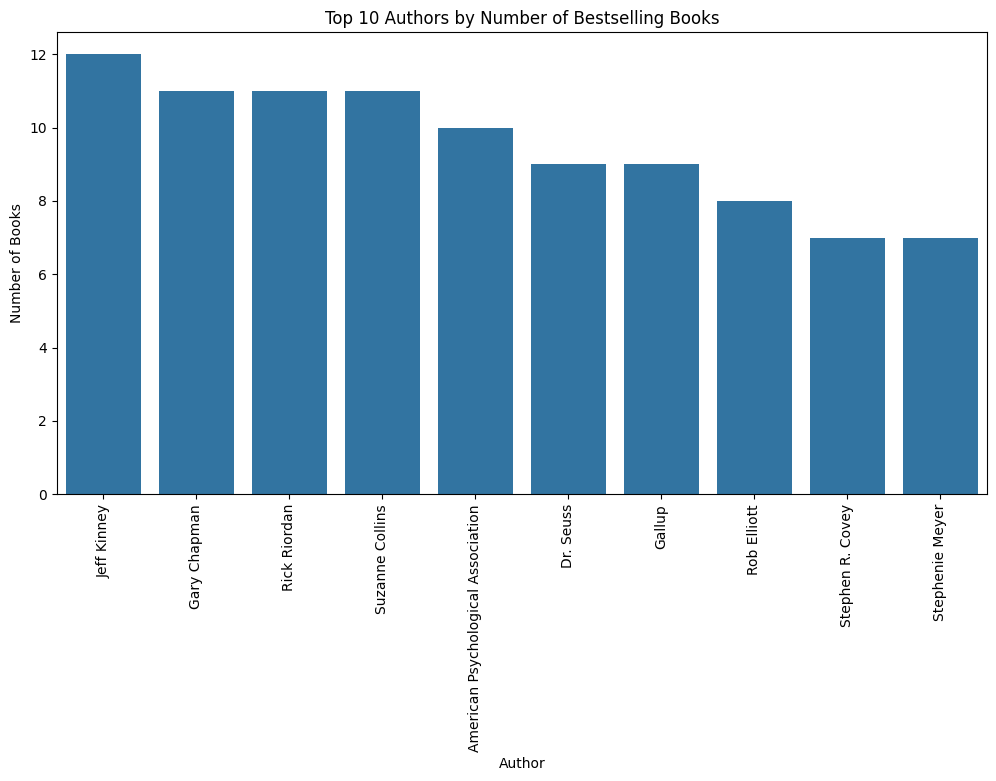

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Author Popularity Visualization
plt.figure(figsize=(12, 6))
sns.countplot(x='Author', data=df, order=df['Author'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top 10 Authors by Number of Bestselling Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()

### Publication Trends Visualization

The publication trends of the top 5 authors is demonstrated using a line chart by showing the number of publications each of the authors have had over the years.

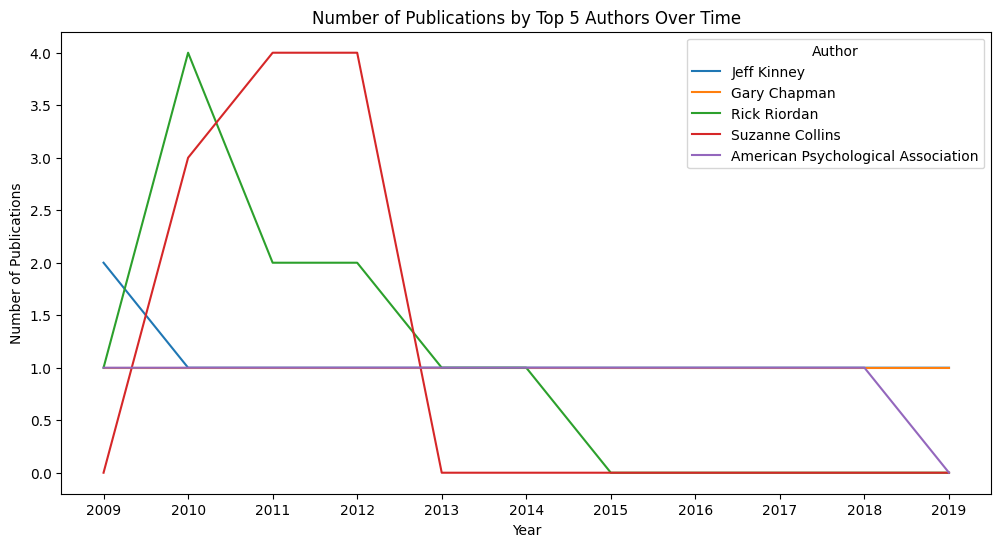

In [24]:
# Publication Trends for Top 5 Authors
author_publication_counts.plot(figsize=(12, 6))
plt.title('Number of Publications by Top 5 Authors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.xticks(range(2009, 2020))
plt.legend(title='Author')
plt.show()

### Price Trends Visualization

The price trends of the books is demonstrated using a line chart by showing the average price of the books over the years.

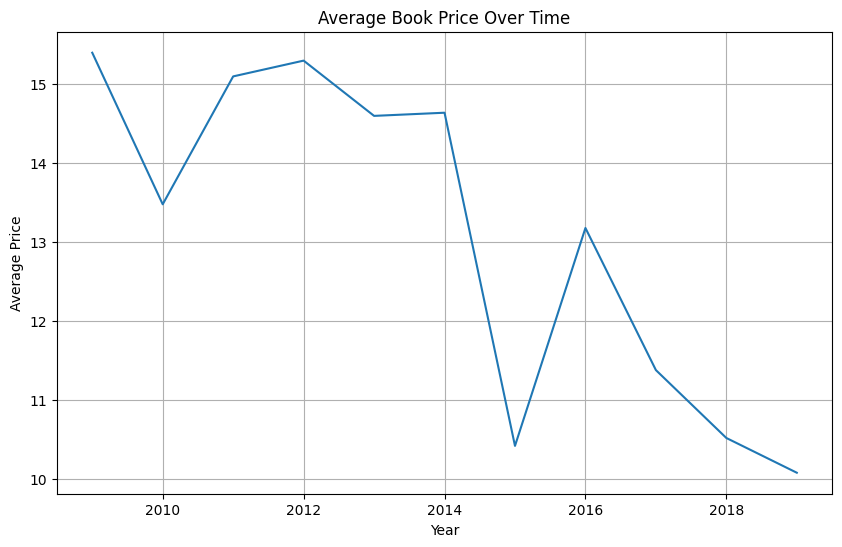

In [25]:
# Price Trends Over Time
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_year.index, average_price_by_year.values)
plt.title('Average Book Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### Ratings & Reviews Box Plots

The ratings and reviews of the bestseller books are visualized into boxplots based on the categories, Fiction and Non-Fiction.

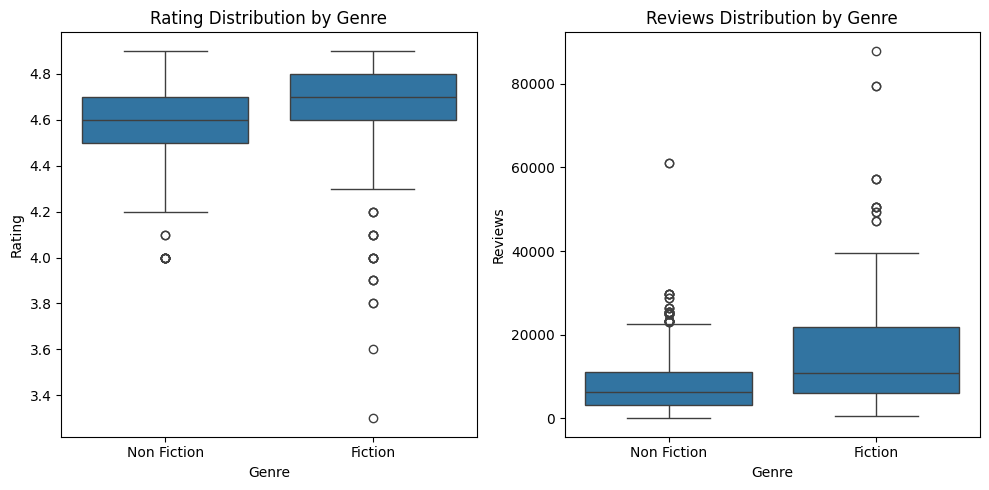

In [26]:
# Comparing Fiction and Non-Fiction (Ratings and Reviews)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Genre', y='Rating', data=df)
plt.title('Rating Distribution by Genre')

plt.subplot(1, 2, 2)
sns.boxplot(x='Genre', y='Reviews', data=df)
plt.title('Reviews Distribution by Genre')

plt.tight_layout()
plt.show()


## Step 4: Clean the Data

Once the data is explored, it might need to be cleaned before running an analysis.

- Drop duplicates
- Rename Columns
- Convert Data Types

In [7]:
# Remove any duplicate rows in the dataset
df.drop_duplicates(inplace=True)

In [8]:
# Rename the columns to be more descriptive
df.rename(columns={"Name": "Title", "Year": "Publication Year", "User Rating": "Rating"}, inplace=True)

In [9]:
# Convert the "Price" column to a float data type
df["Price"] = df["Price"].astype(float)

## Step 5: Run an Analysis

Once the data is cleaned, it is ready for analysis. This could involve calculating summary statistics or creating visualizations.


### Analyzing Author Popularity

An author's popularity can be assessed by analyzing the dataframe and counting the number of best selling books they have in the dataset. This can be done by selecting the 'Author' column data and using the value_counts() method.

In [10]:
author_counts = df['Author'].value_counts()
print(author_counts)

Author
Jeff Kinney                           12
Gary Chapman                          11
Rick Riordan                          11
Suzanne Collins                       11
American Psychological Association    10
                                      ..
Keith Richards                         1
Chris Cleave                           1
Alice Schertle                         1
Celeste Ng                             1
Adam Gasiewski                         1
Name: count, Length: 248, dtype: int64


### Analyzing the Number of Publications the Top 5 Authors have had over the Years

The cleaned data can also be used to check how many books each of the top 5 authors have published over the years. This can be done by first identifying the top 5 authors, then calculate the number of publication by author for each year and finally store the results in the dataframe 'author_publication_counts'.

In [12]:
# Identify the top 5 authors
top_5_authors = df['Author'].value_counts().head(5).index

# Create a DataFrame to store the publication counts
author_publication_counts = pd.DataFrame(index=range(2009, 2020), columns=top_5_authors)
author_publication_counts = author_publication_counts.fillna(0)


for year in range(2009, 2020):
    for author in top_5_authors:
        author_publication_counts.loc[year, author] = len(df[(df['Author'] == author) & (df['Publication Year'] == year)])

author_publication_counts


<ipython-input-12-48383c620a1a>:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  author_publication_counts = author_publication_counts.fillna(0)


Author,Jeff Kinney,Gary Chapman,Rick Riordan,Suzanne Collins,American Psychological Association
2009,2,1,1,0,1
2010,1,1,4,3,1
2011,1,1,2,4,1
2012,1,1,2,4,1
2013,1,1,1,0,1
2014,1,1,1,0,1
2015,1,1,0,0,1
2016,1,1,0,0,1
2017,1,1,0,0,1
2018,1,1,0,0,1


### Average Rating by Genre

The cleaned data can be used to determine the average rating for each genre in the dataset. This can be done by grouping the data by the "Genre" column and calculating the mean of the "Rating" column.

In [11]:
avg_rating_by_genre = df.groupby("Genre")["Rating"].mean()
print(avg_rating_by_genre)

Genre
Fiction        4.648333
Non Fiction    4.595161
Name: Rating, dtype: float64


### Analyzed trends in book prices over time.

The cleaned data is used to analyze the book prices over the years. To do this, the data is first grouped by year and then the mean price is calculated for each year.

In [13]:
# Group the data by year and calculate the mean price for each year
average_price_by_year = df.groupby("Publication Year")["Price"].mean()

# Print the result
average_price_by_year

,Price
Publication Year,
2009,15.40
2010,13.48
2011,15.10
2012,15.30
2013,14.60
2014,14.64
2015,10.42
2016,13.18
2017,11.38


### Compare Fiction vs. Non-Fiction books in terms of ratings and reviews.

Using the cleaned data, Fiction and Non-Fiction books' are compared based on their ratings and reviews.

In [20]:
# Compare Fiction vs. Non-Fiction books in terms of ratings and reviews
fiction_ratings = df[df['Genre'] == 'Fiction']['Rating']
non_fiction_ratings = df[df['Genre'] == 'Non Fiction']['Rating']

print("Rating")
print("Fiction Average Rating:", fiction_ratings.mean())
print("Non-Fiction Average Rating:", non_fiction_ratings.mean())

print("\nReviews")
# Compare the number of reviews
fiction_reviews = df[df['Genre'] == 'Fiction']['Reviews']
non_fiction_reviews = df[df['Genre'] == 'Non Fiction']['Reviews']

print("Fiction Average Reviews:", fiction_reviews.mean())
print("Non-Fiction Average Reviews:", non_fiction_reviews.mean())


Rating
Fiction Average Rating: 4.6483333333333325
Non-Fiction Average Rating: 4.59516129032258

Reviews
Fiction Average Reviews: 15683.791666666666
Non-Fiction Average Reviews: 9065.145161290322


## Step 6: Export the Results

Once the analysis has been performed and insights are obtained, the results can be exported into a file for further analysis. This can be done using the to_csv() function to export the cleaned and analyzed Dataframe to a CSV file.

In [27]:
# Export top selling authors to a CSV file
author_counts.head(10).to_csv("top_authors.csv")

# Export average rating by genre to a CSV file
avg_rating_by_genre.to_csv("avg_rating_by_genre.csv")

# Export Number of Publications by the Top 5 Authors have had over the Years
author_publication_counts.to_csv("author_publication_counts.csv")

# Export the Price Trends over the Years
average_price_by_year.to_csv("average_price_by_year.csv")